# Divergence of a 2D Rigid Airfoil with Torsional Spring Attachment

***

Welcome to the first notebook of the aeroelasticity course! If you are not familiar with Python, we suggest you to have a go with the [_Quick Python Intro_](00_Quick_Python_Intro.ipynb) provided as the notebook zero of this series.

In this notebook we'll look at a first example of static aeroelastic behavior: the divergence of a 2D airfoil. We'll first study the behavior employing a small angle approximation and then we'll move on to the analysis with finite angles.

## Small angle approximation

***

Let's consider the 2D symmetric thin airfoil below, immersed in an air flow with free stream velocity $V$ with initial incidence $\theta_0$. The airfoil has chord $c$, is rigid and it is attached to a torsional srping with stiffness $K_\theta$ at a distance $ec$ aft of the aerodynamic center, which for thin airfoils is located at the quarter chord point.

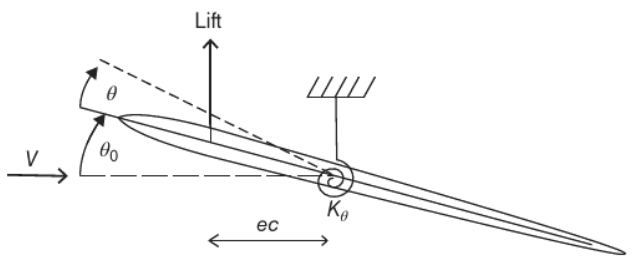

In [1]:
from IPython.display import Image  # class to display images
import os  # module with miscellaneous operating system interfaces

Image(filename=os.path.join('resources', '01_Airfoil.PNG'))  # display image

We can represent the intial aerodynamic force generated on the airfoil with the lift force applied at the aerodynamic center shown in the figure. Note that for a thin symmetric airfoil the aerodynamic moment about the quarter chord point is zero and it does not vary with the angle of attack.

The initial lift acting on the airfoil produces a moment with respect to the attachment point of the torsional spring, which induces an elastic twist $\theta$. This increases the lift, which in turn induces more elastic twist and so on, until an equilibrium with the elastic force exerted by the torsional spring is reached. We want to calculate the angle $\theta$ where equilibrium is achieved and in order to do this we are going to apply Lagrange's equations.

The general form of Lagrange's equations is given as:

$$\frac{\mathrm{d}}{\mathrm{d}t}\left(\frac{\partial T}{\partial\mathbf{\dot{q}}}\right) - \frac{\partial T}{\partial\mathbf{q}} + \frac{\partial \Im}{\partial\mathbf{\dot{q}}} + \frac{\partial U}{\partial\mathbf{q}} = \mathbf{Q} = \frac{\partial\left(\delta W\right)}{\partial\left(\delta\mathbf{q}\right)},$$

where $\mathrm{d}/\mathrm{d}t$ is the derivative with respect to time, $\mathbf{q}$ is the vector of generalized coordinates, $T$ is the kinetic energy, $\Im$ is the dissipative function, $U$ is the elastic potential energy, $\mathbf{Q}$ is the vector of generalized forces and $\delta W$ is the incremental work done when the generalized force $Q_i$ moves through an incremental displacement $\delta q_i$.

Let's look at the left-hand side of the equation. In our case we consider static loads, meaning that displacements and rotations happen very slowly and that we can neglect any velocity associated with them. Furthermore, we do not consider any energy dissipation in our analysis. As a consequence, both the kinetic energy and the dissipative function are assumed to be zero. Hence, we are left only with the elastic potential energy component:

$$\frac{\partial U}{\partial\mathbf{q}}=\frac{\partial}{\partial\theta}\left(\frac{1}{2}K_\theta\theta^2\right)=K_\theta\theta,$$

where $\frac{1}{2}K_\theta\theta^2$ is the elastic potential energy associated to the torsional spring and $\theta$ is the only generalized coordinate of our problem.

As far as the right-hand side of Lagrange's equation, we need to consider the total lift acting on the airfoil, which can be expressed as:

$$L=\frac{1}{2}\rho V^2cc_l,$$

where $\rho$ is the air density and $c_l$ is the lift coefficient. This in turn can be calculated in the form of:

$$c_l=a_1\alpha=a_1\left(\theta_0+\theta\right),$$

where $a_1$ is the lift curve slope of the airfoil, and the angle of attack $\alpha$ is equal to the total incidence of the airfoil, $\theta_0+\theta$. We remind that the zero lift angle $\alpha_0$ is zero for a symmetric airfoil.

The moment produced by the lift force about the attachment point of the torsional spring is:

$$M=Lec\cos\left(\theta_0+\theta\right),$$

where $ec\cos\left(\theta_0+\theta\right)$ is the moment arm of the lift, which is dependent on the total incidence of the airfoil. In the small angle approximation, $\cos\left(\theta_0+\theta\right)\approx1$ and the moment can be written as:

$$M=\frac{1}{2}\rho V^2ec^2a_1\left(\theta_0+\theta\right)=qec^2a_1\left(\theta_0+\theta\right),$$

where we have used $q$ to indicate the dynamic pressure $\frac{1}{2}\rho V^2$. Be careful not to confuse it with the vector of generalized coordinates $\mathbf{q}$ used previously!

The associated generalized moment is calculated as:

$$Q_\theta = \frac{\partial\left(\delta W\right)}{\partial\left(\delta\theta\right)} = \frac{\partial\left(qec^2a_1(\theta_0+\theta)\delta\theta\right)}{\partial\left(\delta\theta\right)}=qec^2a_1(\theta_0+\theta).$$

We can now equate the result for the left-hand side of the equation to the one for the right-hand side and solve for $\theta$:

$$K_\theta\theta=qec^2a_1\left(\theta_0+\theta\right)$$
$$\theta=\frac{qec^2a_1}{K_\theta-qec^2a_1}\theta_0$$

If we use $R=ec^2a_1$ we can rearrange our result as:

$$\theta=\frac{qR}{1-qR}\theta_0.$$

From this last equation, we note that the elastic twist $\theta$ goes to infinity if $1-qR=0$, that is to say if $q=1/R$. The speed associated to this dynamic pressure is called divergence speed:

$$q_{div}=\frac{1}{R}=\frac{K_\theta}{ec^2a_1}.$$

Hence, our previous result can be written as:

$$\frac{\theta}{\theta_0}=\frac{q/q_{div}}{1-q/q_{div}}.$$

Let's visualize how the elastic twist changes with the dynamic pressure.

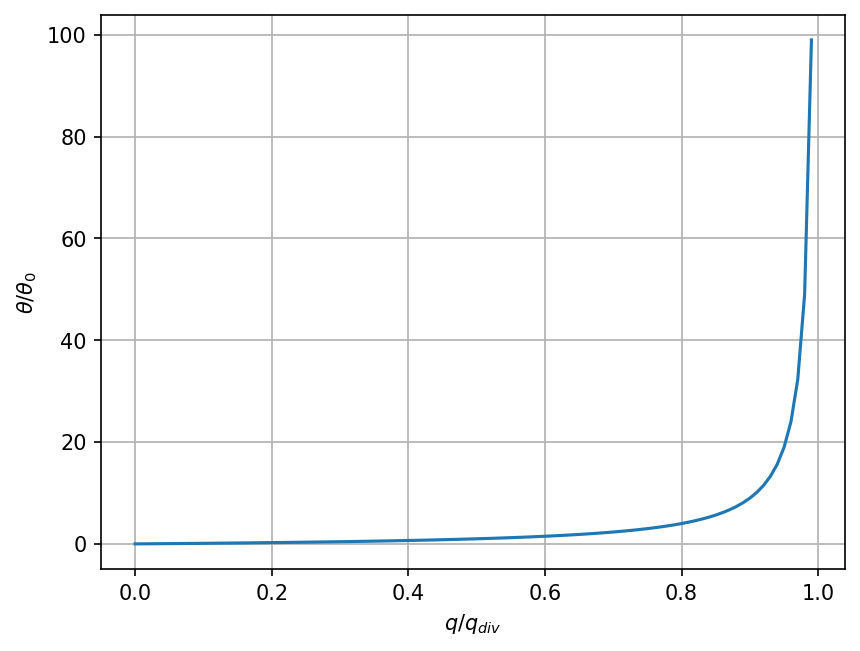

In [2]:
import numpy as np  # import array library
import matplotlib.pyplot as plt  # import plotting library

nondimensional_dynamic_pressure = np.arange(0, 1, .01)  # define range of q/q_div from 0 to .99
nondimensional_twist = nondimensional_dynamic_pressure/(1-nondimensional_dynamic_pressure)  # calculate theta/theta_0
plt.rcParams['figure.dpi'] = 150  # set default dpi of figures
plt.plot(nondimensional_dynamic_pressure, nondimensional_twist)  # plot results
plt.xlabel('$q/q_{div}$')  # set the label for the x-axis
plt.ylabel('$\\theta/\\theta_0$')  # set the label for the y-axis
plt.grid()  # configure the grid lines
plt.show()  # display all open figures

In [3]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

As expected, we observe that the elastic twist goes to infinity when the dynamic pressure approaches $q_{div}$. What does it mean that the eleastic twist becomes infinite? In reality, infinite deflections are not possible, so this means that the structure will fail. This happens because the pitching moment caused by the aerodynamic forces overcomes the structural restoring moment.

How can we increase the divergence speed? Looking at the formula of $q_{div}$, we note that its value depends on four different parameters. However, we should only consider $K_\theta$ and $e$ to change the divergence behavior of our airfoil. In fact, the chord and the lift slope are a result of the aerodynamic design of the airfoil, and it is very difficult to change these parameters without turning upside down its aerodynamic performance. Instead, we can work on the structural design to tune $K_\theta$ and $e$ and obtain a more favorable divergence speed.

Let's consider an airfoil with chord $c=1$ m, a torsional spring attached at $48\%$ of the chord, and lift slope $a_1=2\pi$ rad$^{-1}$, following the thin airfoil theory.

In [4]:
x_spring = .48  # nondimensional distance between leading edge and elastic axis
x_ac = .25  # nondimensional distance between leading edge and aerodynamic center
e = x_spring - x_ac  # calculate the nondimensional distance between elastic axis and aerodynamic center
c = 1  # chord [m]
a_1 = 2*np.pi  # lift slope [1/rad]

We investigate the variation of the divergence speed for a torsional stiffness between $10^3$ and $10^4$ Nm/rad and we plot the results in terms of divergence speed $V_{div}$ versus torsional stiffness $K_\theta$.

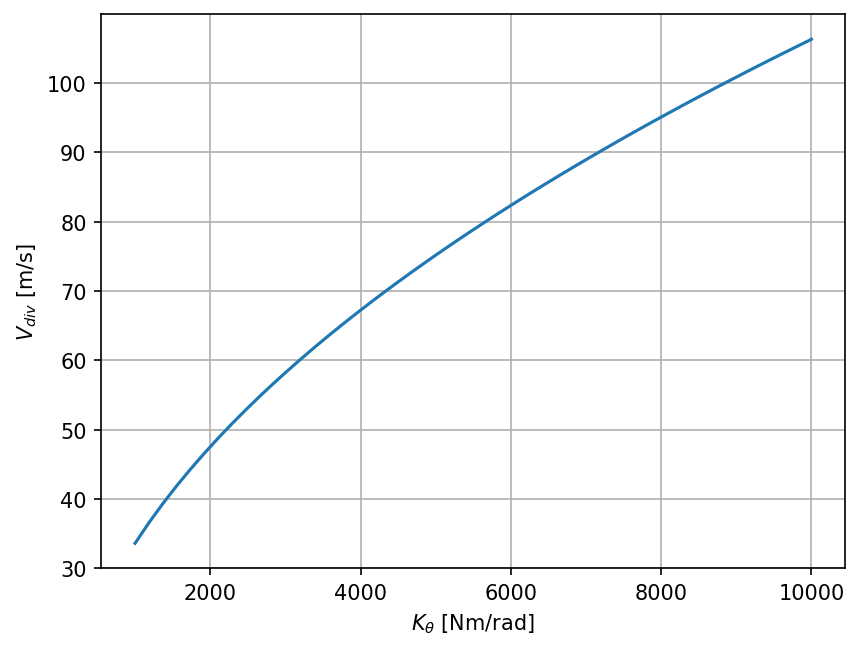

In [5]:
k_theta_range = np.linspace(1e3, 1e4)  # range of torsional stiffnesses between 1e3 and 1e4 Nm/rad
q_div_range = k_theta_range/(e*c**2*a_1)  # calculate corresponding divergence dynamic pressures
rho = 1.225  # air density [kg/m^3]
v_div_range = np.sqrt(2*q_div_range/rho)  # calculate divergence speeds corresponding to the divergence dynamic pressures
plt.plot(k_theta_range, v_div_range)  # plot divergence speed vs torsional stiffness
plt.xlabel('$K_\\theta$ [Nm/rad]')  # set the label for the x-axis
plt.ylabel('$V_{div}$ [m/s]')  # set the label for the y-axis
plt.grid()  # configure the grid lines
plt.show()  # display all open figures

As expected, we can observe a quadratic relation between $K_\theta$ and $V_{div}$, given the square exponent in the relation between dynamic pressure and speed. If we halve $K_\theta$ the divergence speed will reduce by a factor $\sqrt{1/2}$, if we double $K_\theta$ the divergence speed will increase by a factor $\sqrt{2}$.

Consequently, can we say that is always beneficial to increase the torsional stiffness as much as possible to improve our divergence performance? In theory yes, but in practice, when we consider a real wing, this will most probably induce significant mass penalties, and a very heavy wing is the last thing we want! This means that we need to find the right compromise between providing an adequate torsional stiffness to our wing and not adding too much weight to it.

What about $e$? Let's investigate an airfoil with $K_\theta=5\cdot10^3$ Nm/rad and a range of locations of the spring going from the leading edge to the trailing edge. We plot our results in terms of divergence speed $V_{div}$ versus the location of the spring nondimensionalized by the chord $x_{spring}/c$.

C:\Users\qa21944\AppData\Local\Temp\ipykernel_14764\1966520827.py:6: RuntimeWarning: invalid value encountered in sqrt
  v_div_range = np.sqrt(2*q_div_range/rho)  # divergence speeds associated with the dynamic pressures


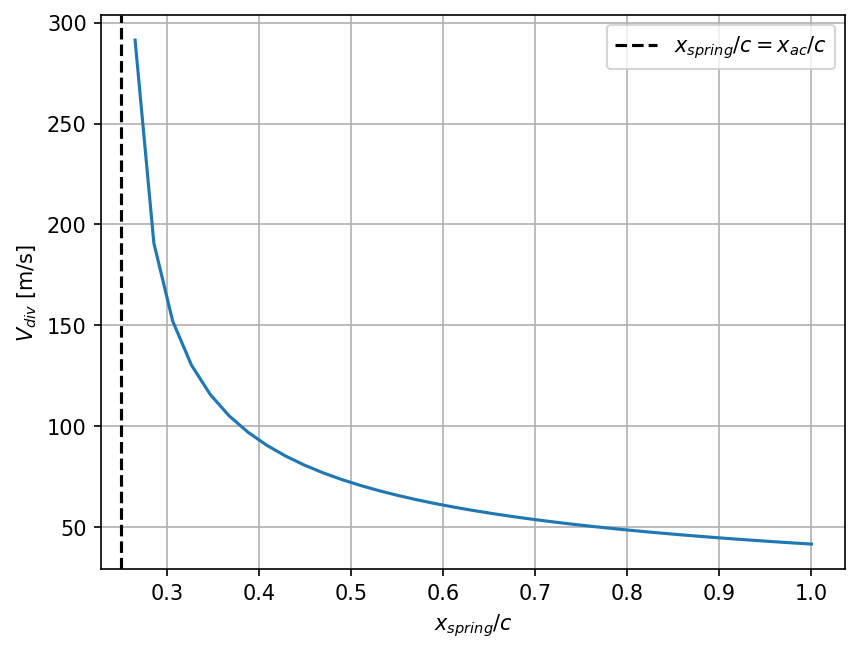

In [6]:
k_theta = 5e3  # torsional stiffnesses [Nm/rad]
x_spring_range = np.linspace(0, 1)  # range of nondimensional distance between leading edge and spring
e_range = x_spring_range - x_ac  # corresponding range of nondimensional distance between spring and aerodynamic center
q_div_range = k_theta/(e_range*c**2*a_1)  # corresponding divergence dynamic pressures
rho = 1.225  # air density [kg/m^3]
v_div_range = np.sqrt(2*q_div_range/rho)  # divergence speeds associated with the dynamic pressures
fig, ax = plt.subplots()  # create a figure with one plot
ax.plot(x_spring_range, v_div_range)  # plot divergence speed vs the spring position
ax.axvline(x=x_ac, color='k', ls='--', label='$x_{spring}/c=x_{ac}/c$')  # plot x_spring=x_ac line
ax.legend()  # place legend in the plot
plt.xlabel('$x_{spring}/c$')  # set the label for the x-axis
plt.ylabel('$V_{div}$ [m/s]')  # set the label for the y-axis
plt.grid()  # configure the grid lines
plt.show()  # display all open figures

We observe that the divergence speed increases exponentially as the location of the spring moves from the trailing edge towards the aerodynamic center. However, we can't see any curve before the aerodynamic center. What's happening in the plot? Well, python is giving us a hint, since it has thrown a warning saying that an invalid value was encountered in the square root operation. In fact, when the spring is placed before the aerodynamic center, the value of $e$ becomes negative and consequently also the value of $q_{div}$. A warning is thrown because we are trying to take the square root of a negative number. But what does a negative value of $q_{div}$ mean in this case? The plot can help us understand this. As we approach $x_{spring}/c=x_{ac}/c$, so $e=0$, the divergence speed goes to infinity. In practice this simply means that divergence does not occur. In an analogous way divergence will not occur if we place the spring before the aerodynamic center.

You may think: let's always design our wings to have the aerodynamic center aft of the elastic axis (equivalent to the torsional spring for a wing) and get rid of divergence! Well, it turns out that when you consider a real wing this design choice is not generally possible to implement, so we must always consider divergence for the aeroelastic design and provide an adequate torsional stiffness to the structure.

## Finite angles

***

So far we have worked under the small angle assumption and we have assumed the term $\cos\left(\theta_0+\theta\right)$ to be approximately equal to $1$. Consequentely, the moment arm of the lift force was equal to $ec$. What happens if we remove the small angle approximation and we consider the term $ec\cos\left(\theta_0+\theta\right)$ fully? Our equilibrium equation will transform in the following way:

$$K_\theta\theta=qec^2a_1\left(\theta_0+\theta\right)\cos\left(\theta_0+\theta\right).$$

Unfortunately, due to the presence of the cosine term, we cannot rearrange this equation and separate the unknown $\theta$ from the rest of the known variables. As a consequence we have to move everything to the left-hand side and solve the equation numerically:

$$K_\theta\theta-qec^2a_1\left(\theta_0+\theta\right)\cos\left(\theta_0+\theta\right)=0.$$

To solve the equation numerically, we are going to use the [`fsolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) function from the `optimize` module of the `scipy` library. Let's import it.

In [7]:
from scipy.optimize import fsolve  # function to find the roots of an equation

Note that with the kind of import above we have imported uniquely the `fsolve` function and not an entire module. This means that we must call the `fsolve` function without preeceding it with anything.

The basic syntax of `fsolve()` is `fsolve(func, x0)`, where `func` is a so-called "callable", representing the equation to be solved, and `x0` is the starting estimate for the roots of the equation, as the algorithm needs to start from an initial guess and then work its way to the root of the equation. How do we define the equation to be solved as a callable? We need to use Python's Lambda function. You may be thinking now: "Oh my god, what is this mythological creature?" Don't worry, it simpler than what it seems, as it is just a way to define a small anonymous function. Let's consider an initial incidence $\theta_0=2$ degrees and a dynamic pressure $q=100$ Pa and let's see it in action.

In [8]:
theta_0 = np.deg2rad(2)  # initial incidence of the airfoil [rad]
q = 100  # dummy value for the dynamic pressure [Pa]
func = lambda theta: k_theta*theta - q*e*c**2*a_1*(theta_0 + theta)*np.cos(theta_0 + theta)  # equation to be solved numerically

Basically what we have defined above is a function in the form $y=f(\theta)$. If we call `func` with argument $\theta=5$ degrees, we will obtain the value of $f(\theta=5)$.

In [9]:
print(func(np.deg2rad(5)))

418.8082897040237


If you want to know more about Lambda functions, you can have a look [here](https://realpython.com/python-lambda/).

What `fsolve()` will do is solving $f(\theta)=0$, which is exactly what we want! We need to solve the equation for a range of dynamic pressures $q$ going from $0$ Pa to a value large enough to observe any potential difference with the small angle approximation model. So we set the upper bound of $q$ to twice the divergence dynamic pressure predicted by the small angle approximation model, $q_{div,approx}$. We also initialize the array with the resulting values of $\theta$ as an empty array with the same shape of the one defining the range of dynamic pressures, and we define the initial value for the initial guess of `fsolve()` to be zero.

In [10]:
q_div_small_angle = k_theta/(e*c**2*a_1)  # calculate the divergence dynamic pressure predicted by the small angle approximation model
q_range = np.linspace(0, q_div_small_angle*2)  # define a range of dynamic pressures from 0 to twice the divergence pressure predicted by the small angle approximation model
theta_range = np.empty(np.shape(q_range))  # initialize the array containing the results for the elastic twist
theta_initial_guess = 0  # define value of the starting estimate for the numerical solver [rad]

Now we need to iterate over the defined values of dynamic pressures and call `fsolve()` each time to find the corresponding `\theta`. A smart way to implement this iteration in Python is by using the `enumerate()` built-in function. When we define a `for` loop with `enumerate()` we are able to access at the same time the counter of the iteration, which will start from zero, and the value of the array we are iterating over. This is very useful when we want to assign the result of an operation inside a `for` loop to the elements of an array. Have a look at how this works below.

In [11]:
for i, q in enumerate(q_range):  # iterate through the values of dynamic pressures
    theta_range[i] = fsolve(func, theta_initial_guess)  # calculate elastic twist for current value of dynamic pressure
    theta_initial_guess = theta_range[i]  # update starting estimate for numerical solver

Note that we have updated the starting estimate for the numerical solver with the result of every iteration. In fact, we need to keep the starting estimate as close as possible to the root of the equation to prevent the numerical solver from breaking.

Now it's time to plot our results, but it's your turn to code! Try the following:

- create a new figure with one plot using the `subplots` function;
- plot the nondimensional elastic twist obtained from the solution of the nonlinear equation `theta_range/theta_0` versus the dynamic pressure `q_range`;
- calculate the nondimensional elastic twist predicted by the small angle approximation model and plot it versus the dynamic pressure on the same axes;
- add a black dashed vertical line for $q$ equal to the divergence dynamic pressure predicted by the small angle approximation model `q_div_small_angle`;
- add legend, set up the label of the axes, configure the grid lines and display the figure.

Remember to name your curves with the `label` argument in order to display the legend correctly!

What do you observe in the plot? Is the finite angle model different from the small angle approximation one? Does it still predict divergence in an analogous way? If not, why? Can you think of any reason why this finite angle model may break for large values of elastic twist?

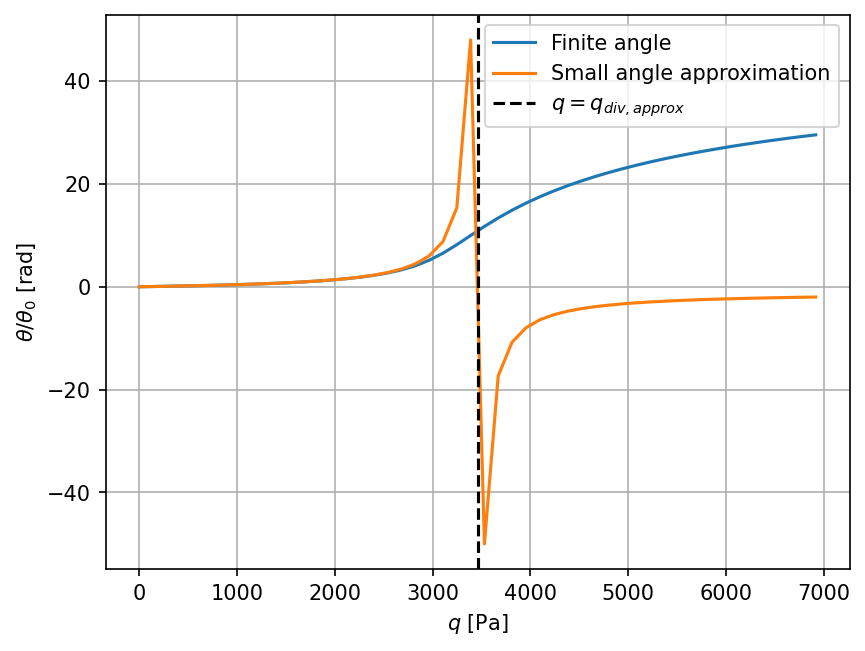

In [12]:
fig, ax = plt.subplots()  # create a figure with one plot

ax.plot(q_range, theta_range/theta_0, label='Finite angle')  # plot results

nondimensional_theta_small_angle_range = q_range/q_div_small_angle/(1-q_range/q_div_small_angle)  # calculate nondimensional elastic twist predicted by small angle approximation model
ax.plot(q_range, nondimensional_theta_small_angle_range, label='Small angle approximation')  # plot results on same axes

ax.axvline(x=q_div_small_angle, color='k', ls='--', label='$q=q_{div,approx}$')  # plot q=q_div_small_angle line

ax.legend()  # place legend in the plot
plt.xlabel('$q$ [Pa]')  # set the label for the x-axis
plt.ylabel('$\\theta/\\theta_0$ [rad]')  # set the label for the y-axis
plt.grid()  # configure the grid lines
plt.show()  # display all open figures

In the [next notebook](02_Divergence_of_a_Fixed_Root_Flexible_Wing.ipynb) we'll move from the airfoil to a finite wing and we'll have a look at its divergence behavior.